### Imports and Declarations

In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('BTC-USD.csv')
print(df.head())

NameError: name 'pd' is not defined

In [3]:
# Checking datatype of Date variable
print(type(df['Date'][1]))

<class 'str'>


In [4]:
# Converting the Date to datetime format, in order to use the as the X-axis in our plots
dates = pd.to_datetime(df['Date'])
print(dates.head())

0   2017-11-09
1   2017-11-10
2   2017-11-11
3   2017-11-12
4   2017-11-13
Name: Date, dtype: datetime64[ns]


In [5]:
# Checking the datatype of the other variables
print(type(df['Open'][1]))
print(type(df['High'][1]))
print(type(df['Low'][1]))
print(type(df['Close'][1]))
print(type(df['Adj Close'][1]))
print(type(df['Volume'][1]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [6]:
variables = list(df)[1:]
print(variables) #['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [7]:
variables_f = df[variables].astype(float)
print(variables_f.head())

          Open         High          Low        Close    Adj Close  \
0  7446.830078  7446.830078  7101.520020  7143.580078  7143.580078   
1  7173.729980  7312.000000  6436.870117  6618.140137  6618.140137   
2  6618.609863  6873.149902  6204.220215  6357.600098  6357.600098   
3  6295.450195  6625.049805  5519.009766  5950.069824  5950.069824   
4  5938.250000  6811.189941  5844.290039  6559.490234  6559.490234   

         Volume  
0  3.226250e+09  
1  5.208250e+09  
2  4.908680e+09  
3  8.957350e+09  
4  6.263250e+09  


In [8]:
scaler = MinMaxScaler()
scaler = scaler.fit(variables_f)
variables_scaled = scaler.transform(variables_f)
print(variables_scaled)

[[0.06546927 0.06367244 0.06187956 0.06073083 0.06073083 0.00086937]
 [0.06122288 0.06161442 0.05136141 0.05256296 0.05256296 0.00656405]
 [0.0525914  0.05491587 0.0476797  0.0485129  0.0485129  0.00570333]
 ...
 [0.70576314 0.73353452 0.71014391 0.73912216 0.73912216 0.0726925 ]
 [0.73965506 0.74088693 0.7488942  0.73970752 0.73970752 0.06161355]
 [0.74041489 0.7311573  0.74449816 0.73360872 0.73360872 0.04627854]]


In [9]:
# We can use preprocessing.make_lags() for storing the values
features_set = []
labels = []
for i in range(50, len(variables_scaled)):
    features_set.append(variables_scaled[i-50:i, 0:variables_scaled.shape[1]])
    labels.append(variables_scaled[i:i+1, 5])

#print(features_set[0][0:5])
#print(list(labels[0][0:5]))

features_set, labels = np.array(features_set), np.array(labels)

#print(features_set[0][0:5])
#print(list(labels[0][0:5]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_set, labels, test_size=0.2, train_size=0.8,
                                                    random_state=None, shuffle=False, stratify=None)

print('X_train shape: {}.'.format(X_train.shape))
print('X_test shape: {}.'.format(X_test.shape))
print('y_train shape: {}.'.format(y_train.shape))
print('y_test shape: {}.'.format(y_test.shape))

X_train shape: (1166, 50, 6).
X_test shape: (292, 50, 6).
y_train shape: (1166, 1).
y_test shape: (292, 1).


In [164]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
#model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 50, 64)            18176     
                                                                 
 lstm_24 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [165]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
33/33 - 3s - loss: 0.0012 - val_loss: 0.0128 - 3s/epoch - 84ms/step
Epoch 2/10
33/33 - 1s - loss: 4.4483e-04 - val_loss: 0.0092 - 895ms/epoch - 27ms/step
Epoch 3/10
33/33 - 1s - loss: 3.6656e-04 - val_loss: 0.0107 - 863ms/epoch - 26ms/step
Epoch 4/10
33/33 - 1s - loss: 3.6659e-04 - val_loss: 0.0097 - 870ms/epoch - 26ms/step
Epoch 5/10
33/33 - 1s - loss: 3.4192e-04 - val_loss: 0.0091 - 858ms/epoch - 26ms/step
Epoch 6/10
33/33 - 1s - loss: 3.2043e-04 - val_loss: 0.0100 - 883ms/epoch - 27ms/step
Epoch 7/10
33/33 - 1s - loss: 3.0460e-04 - val_loss: 0.0108 - 874ms/epoch - 26ms/step
Epoch 8/10
33/33 - 1s - loss: 3.4473e-04 - val_loss: 0.0101 - 865ms/epoch - 26ms/step
Epoch 9/10
33/33 - 1s - loss: 3.1112e-04 - val_loss: 0.0110 - 882ms/epoch - 27ms/step
Epoch 10/10
33/33 - 1s - loss: 3.2654e-04 - val_loss: 0.0101 - 860ms/epoch - 26ms/step


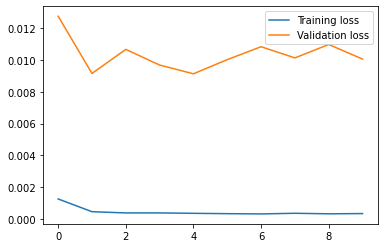

In [166]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [167]:
predictions = model.predict(X_test)
#print(predictions)

In [168]:
predictions_copy = np.repeat(predictions, variables_f.shape[1], axis=-1)
predictions_inv = scaler.inverse_transform(predictions_copy)[:,0]
#print(predictions_inv)

In [169]:
df_forecast = pd.DataFrame({'Date':np.array(dates[50+len(y_train):50+len(y_train)+len(y_test)]), 'Adj Close':predictions_inv})
print(df_forecast)

          Date     Adj Close
0   2021-03-09  12267.336914
1   2021-03-10  12049.919922
2   2021-03-11  11931.263672
3   2021-03-12  11880.441406
4   2021-03-13  11857.158203
..         ...           ...
287 2021-12-21   8682.895508
288 2021-12-22   8663.481445
289 2021-12-23   8648.880859
290 2021-12-24   8660.293945
291 2021-12-25   8678.907227

[292 rows x 2 columns]


In [170]:
df_original = pd.DataFrame({'Date':np.array(dates), 'Adj Close':df['Adj Close'].values})
print(df_original)

           Date     Adj Close
0    2017-11-09   7143.580078
1    2017-11-10   6618.140137
2    2017-11-11   6357.600098
3    2017-11-12   5950.069824
4    2017-11-13   6559.490234
...         ...           ...
1503 2021-12-21  48936.613281
1504 2021-12-22  48628.511719
1505 2021-12-23  50784.539063
1506 2021-12-24  50822.195313
1507 2021-12-25  50429.859375

[1508 rows x 2 columns]


In [171]:
type(df_original['Date'][0])
type(df_forecast['Date'][0])
df['Adj Close'].values

array([ 7143.580078,  6618.140137,  6357.600098, ..., 50784.539063,
       50822.195313, 50429.859375])

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

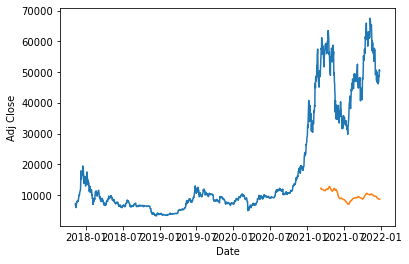

In [172]:
sns.lineplot(x=df_original['Date'], y=df_original['Adj Close'])
sns.lineplot(x=df_forecast['Date'], y=df_forecast['Adj Close'])

In [88]:
dates[50+len(y_train):50+len(y_train)+len(y_test)]

1216   2021-03-09
1217   2021-03-10
1218   2021-03-11
1219   2021-03-12
1220   2021-03-13
          ...    
1503   2021-12-21
1504   2021-12-22
1505   2021-12-23
1506   2021-12-24
1507   2021-12-25
Name: Date, Length: 292, dtype: datetime64[ns]

In [82]:
len(dates)

1508

In [83]:
len(y_test) +len(y_train)

1458

In [84]:
dates.head()

0   2017-11-09
1   2017-11-10
2   2017-11-11
3   2017-11-12
4   2017-11-13
Name: Date, dtype: datetime64[ns]

In [85]:
len(df)

1508

In [86]:
len(variables_f)

1508

In [87]:
len(variables_scaled)

1508

In [91]:
X_train_inv = scaler.inverse_transform(features_set[1100])
print(X_train_inv)

[[1.62764404e+04 1.64631777e+04 1.59921523e+04 1.63178086e+04
  1.63178086e+04 3.15994922e+10]
 [1.63178086e+04 1.63178086e+04 1.57491934e+04 1.60681387e+04
  1.60681387e+04 2.74817101e+10]
 [1.60681396e+04 1.61231104e+04 1.57935342e+04 1.59555879e+04
  1.59555879e+04 2.36538676e+10]
 [1.59555771e+04 1.68161816e+04 1.58807061e+04 1.67161113e+04
  1.67161113e+04 3.15267667e+10]
 [1.66856914e+04 1.77829199e+04 1.65645449e+04 1.76454062e+04
  1.76454062e+04 3.90068492e+10]
 [1.76451914e+04 1.83939492e+04 1.73529062e+04 1.78040059e+04
  1.78040059e+04 4.90648003e+10]
 [1.78038613e+04 1.81195469e+04 1.73825547e+04 1.78170898e+04
  1.78170898e+04 3.69850554e+10]
 [1.78170840e+04 1.87732266e+04 1.77657949e+04 1.86213145e+04
  1.86213145e+04 3.69928739e+10]
 [1.86213164e+04 1.89366211e+04 1.84443594e+04 1.86422324e+04
  1.86422324e+04 3.96502107e+10]
 [1.86422324e+04 1.86889688e+04 1.76713848e+04 1.83700020e+04
  1.83700020e+04 4.12804342e+10]
 [1.83700176e+04 1.87114258e+04 1.80007969e+04 1.8

In [89]:
features_set[1215]

array([[0.74537807, 0.74851951, 0.73293551, 0.76184846, 0.76184846,
        0.13122974],
       [0.76246394, 0.78683251, 0.77211493, 0.80191671, 0.80191671,
        0.13788061],
       [0.80212971, 0.82398682, 0.79283091, 0.82032853, 0.82032853,
        0.15622124],
       [0.81984246, 0.83669869, 0.81172138, 0.84825592, 0.84825592,
        0.15471789],
       [0.84873282, 0.83525715, 0.82583824, 0.84090272, 0.84090272,
        0.15160794],
       [0.84130284, 0.89153868, 0.83915227, 0.9016985 , 0.9016985 ,
        0.16591613],
       [0.90159756, 0.89022682, 0.88796232, 0.87152956, 0.87152956,
        0.11773662],
       [0.87121973, 0.87409406, 0.8260996 , 0.81875304, 0.81875304,
        0.1824357 ],
       [0.81793937, 0.81749855, 0.7970109 , 0.83270768, 0.83270768,
        0.1632727 ],
       [0.83325565, 0.85011186, 0.81241824, 0.86482318, 0.86482318,
        0.16473376],
       [0.865399  , 0.86761086, 0.80806554, 0.84909224, 0.84909224,
        0.15176911],
       [0.8491872 , 0

In [137]:
variables_scaled_copy_df = pd.DataFrame(np.array(variables_scaled), columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
variables_scaled_copy_df = variables_scaled_copy_df[50+len(y_train):50+len(y_train)+len(y_test)]
variables_scaled_copy_df['Adj Close'] = predictions
variables_inv = scaler.inverse_transform(variables_scaled_copy_df)
print(variables_inv)

[[5.22729688e+04 5.48241172e+04 5.19818320e+04 5.48241172e+04
  1.39313049e+04 5.09122274e+10]
 [5.48240117e+04 5.72582539e+04 5.32908906e+04 5.60085508e+04
  1.41977035e+04 5.72955776e+10]
 [5.59631797e+04 5.80910625e+04 5.44845938e+04 5.78051211e+04
  1.46577456e+04 5.67723436e+10]
 ...
 [4.86263438e+04 5.13323398e+04 4.80658359e+04 5.07845391e+04
  1.21511034e+04 2.82238781e+10]
 [5.08060508e+04 5.18140273e+04 5.05144961e+04 5.08221953e+04
  1.21922337e+04 2.43679122e+10]
 [5.08549180e+04 5.11765977e+04 5.02367070e+04 5.04298594e+04
  1.22101910e+04 1.90306509e+10]]


In [140]:
variables_inv[:,4]

array([13931.30488961, 14197.70354948, 14657.74560129, 15119.63390262,
       15493.9796852 , 15918.68896908, 15959.006419  , 16278.10275335,
       16424.43001016, 16554.23592198, 16569.79483991, 16413.80305161,
       16277.22468245, 16179.25363384, 16168.06589857, 16149.21900771,
       16407.05935204, 16609.69913638, 16566.11288539, 16321.15890258,
       16075.01530623, 16092.22779656, 16150.42012435, 16457.46119704,
       16696.98666946, 16823.64168711, 16893.18375233, 16731.91970424,
       16762.08661617, 16936.74891427, 17267.01668783, 17126.81963127,
       16790.66418141, 16712.18228077, 16487.14114388, 16387.68906957,
       16750.69853502, 17359.79024688, 17580.262731  , 18093.56802699,
       18188.34216898, 18656.18620669, 18467.89272054, 18219.53669227,
       17708.69018653, 17568.04834296, 17731.9025085 , 17206.24478712,
       16525.58933805, 16217.78905995, 15961.93587825, 15760.36492477,
       15551.13673288, 15547.44519244, 15462.68738546, 15261.2966474 ,
      

In [128]:
variables_scaled_copy_df = pd.DataFrame(np.array(variables_scaled), columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [129]:
print(variables_scaled_copy_df)

          Open      High       Low     Close  Adj Close    Volume
0     0.065469  0.063672  0.061880  0.060731   0.060731  0.000869
1     0.061223  0.061614  0.051361  0.052563   0.052563  0.006564
2     0.052591  0.054916  0.047680  0.048513   0.048513  0.005703
3     0.047567  0.051129  0.036836  0.042178   0.042178  0.017336
4     0.042013  0.053970  0.041984  0.051651   0.051651  0.009595
...        ...       ...       ...       ...        ...       ...
1503  0.678704  0.702527  0.688510  0.710396   0.710396  0.069336
1504  0.710595  0.706250  0.716238  0.705607   0.705607  0.061844
1505  0.705763  0.733535  0.710144  0.739122   0.739122  0.072692
1506  0.739655  0.740887  0.748894  0.739708   0.739708  0.061614
1507  0.740415  0.731157  0.744498  0.733609   0.733609  0.046279

[1508 rows x 6 columns]


In [135]:
variables_scaled_copy_df[50+len(y_train):50+len(y_train)+len(y_test)]

,Open,High,Low,Close,Adj Close,Volume
1216,0.762464,0.786833,0.772115,0.801917,0.801917,0.137881
1217,0.802130,0.823987,0.792831,0.820329,0.820329,0.156221
1218,0.819842,0.836699,0.811721,0.848256,0.848256,0.154718
1219,0.848733,0.835257,0.825838,0.840903,0.840903,0.151608
1220,0.841303,0.891539,0.839152,0.901698,0.901698,0.165916
...,...,...,...,...,...,...
1503,0.678704,0.702527,0.688510,0.710396,0.710396,0.069336
1504,0.710595,0.706250,0.716238,0.705607,0.705607,0.061844
1505,0.705763,0.733535,0.710144,0.739122,0.739122,0.072692
1506,0.739655,0.740887,0.748894,0.739708,0.739708,0.061614
